In [8]:
import numpy as np
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt

p = 0.85
w = 3*np.pi/p

def f(x, w):
    return -2000*np.exp(-(w*x)/2)*np.sin(w*x)

a0 = 2/p*quad(lambda x: f(x, w), 0, p)[0]
q0 = a0/2

a, b, q = [], [], [q0]
num_coeffs = 50
for n in range(1, num_coeffs + 1):
    an = 2/p*quad(lambda x: f(x, w)*np.cos(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    bn = 2/p*quad(lambda x: f(x, w)*np.sin(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    qn = 1/2*(an - 1j*bn)

    a.append(an)
    b.append(bn)
    q.append(qn)

a = np.array(a)
b = np.array(b)


In [9]:
rho = 1
omega0 = 2*np.pi/p
mu = 1
R = 0.0254
nu = mu/rho

def J0(x):
    from math import factorial as fact
    op = 0
    for i in range(10):
        op += ((-1) ** i) * (x **(2 * i))/((fact(i) ** 2) * (4 ** i))
    return op

def vel(t, r):
    #u_0 = lambda r: q0/(4*mu)*(r - R)*(r + R)
    #u = u_0
    #r = np.sqrt(x**2+y**2)
    u = 0
    for i in range(1,40):
        u += np.real(q[i]*1j/(rho*i*omega0)*(1 - J0(1j*lmda(i*omega0)*r)/J0(1j*lmda(i*omega0)*R))*np.exp(1j*i*omega0*t))
    return u + q0/(4*mu)*(r - R)*(r + R)

def lmda(omega) :
    return np.sqrt(omega/(2*nu))*(1+1j)

<IPython.core.display.Javascript object>


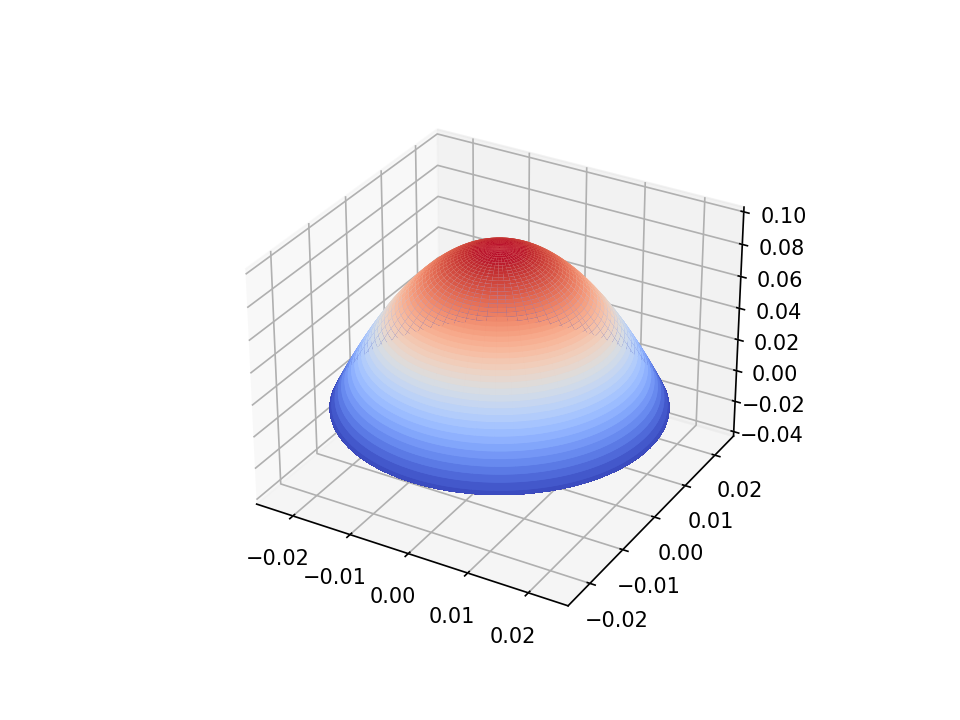

In [34]:
Nt, Nr = 100, 100
from matplotlib import cm
from matplotlib import animation
#import ipywidgets as widgets
from mpl_toolkits import mplot3d
%matplotlib notebook
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
tt = np.linspace(-p/2,3*p/2,Nt)
rr = np.linspace(0,R,Nr)
k = np.linspace(0, 2*np.pi, 100)
M,K = np.meshgrid(rr,k)
X, Y = M*np.cos(K), M*np.sin(K)
#ax.plot_surface(X,Y,P)
#surf, = ax.plot_surface([], [], [])
ax.set_xlim(( -R, R))            
ax.set_ylim((-R, R))
ax.set_zlim((-0.04,0.1))
def drawframe(n):
    P = np.zeros_like(M)
    for i in range(Nr):
        P[i] = vel(tt[n],rr[None,:])
        
    surf = ax.plot_surface(X,Y,P, cmap=matplotlib.cm.coolwarm)
    return surf

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True)   
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
Nt, Nr = 100, 100
from matplotlib import cm
from matplotlib import animation
#import ipywidgets as widgets
from mpl_toolkits import mplot3d
%matplotlib notebook
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
tt = np.linspace(-p/2,p/2,Nt)
rr = np.linspace(0,R,Nr)
k = np.linspace(0, 2*np.pi, 100)
M,K = np.meshgrid(rr,k)
X, Y = M*np.cos(K), M*np.sin(K)
#ax.plot_surface(X,Y,P)
#surf, = ax.plot_surface([], [], [])
ax.set_xlim(( -R, R))            
ax.set_ylim((-R, R))
ax.set_zlim((-0.04,0.1))
import time

def pltsin(ax,t):
    surf_1 = ax.plot_surface
    fig.canvas.draw()

for i in range(Nt):
    pltsin(ax,i)